In [1]:
import os
import glob
import gzip
from collections import OrderedDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Yield of sequencing data

In [2]:
dat = pd.read_csv("data/SraRunTable.scCOLORseq.csv")

array = []
for sample in dat["Run"]:
    d = OrderedDict()
    d["Sample"] = sample
    
    raw_reads = 0
    polya_reads = 0
    for path in glob.glob("results/tallynn/complement_polyA/%s/*.fastq.log" % sample):
        lines = open(path).readlines()
        polya_reads += int(lines[0].split()[-1])
        raw_reads += int(lines[1].split()[-1])
    d["TotalReads"] = raw_reads
    d["TotalRatio"] = 1
    d["PolyAReads"] = polya_reads
    d["PolyARatio"] = d["PolyAReads"] / d["TotalReads"]
    
    unambiguous = 0
    ambiguous = 0
    for path in glob.glob("results/tallynn/identify_perfect/%s/*_perfect_nano.log" % sample):
        lines = open(path).readlines()
        unambiguous += int(lines[1].split()[-1])
        ambiguous += int(lines[2].split()[-1])
    d["WithAdapterReads"] = unambiguous + ambiguous
    d["AdapterRatio"] = d["WithAdapterReads"] / d["TotalReads"]
    
    d["UnambiguousReads"] = unambiguous
    d["AmbiguousReads"] = ambiguous
    
    
    unambiguous_fixed = 0
    for path in glob.glob("results/tallynn/correct_barcode/%s/*.log" % sample):
        lines = open(path).readlines()
        unambiguous_fixed += int(lines[0].split()[-1])
    d["UnambiguousFixedReads"] = unambiguous_fixed
    
    d["MergedFullReads"] = unambiguous + unambiguous_fixed
    d["MergedFullRatio"] = d["MergedFullReads"] / d["TotalReads"]
    
    umi_tools_extract = len(gzip.open("results/tallynn/umitools_extract/%s_R1.fastq.gz" % sample, "rt").readlines()) / 4
    d["UmitoolsExtractReads"] = umi_tools_extract
    d["UmitoolsExtractRatio"] = d["UmitoolsExtractReads"] / d["TotalReads"]
    
    mapped = 0
    for path in glob.glob("results/mapping/minimap2/%s.flagstat" % sample):
        with open(path) as f:
            for line in f:
                if "primary mapped" in line:
                    mapped += int(line.split()[0])
    d["MappedReads"] = mapped
    d["MappedRatio"] = mapped / raw_reads
    
    filtered = 0
    for path in glob.glob("results/mapping/filtered/%s.flagstat" % sample):
        with open(path) as f:
            for line in f:
                if "primary mapped" in line:
                    filtered += int(line.split()[0])
    d["FilteredReads"] = filtered
    d["FilteredRatio"] = filtered / raw_reads
                    
    clip_filtered = 0
    for path in glob.glob("results/mapping/stat_clip/%s.flagstat" % sample):
        with open(path) as f:
            for line in f:
                if "primary mapped" in line:
                    clip_filtered += int(line.split()[0])
    d["ClipFilteredReads"] = clip_filtered
    d["ClipFilteredRatio"] = clip_filtered / raw_reads
    
    array.append(d)

In [3]:
m = pd.DataFrame(array)
m.index = m["Sample"]
m.to_csv("data_yield_of_sccolor_seq.tsv", sep="\t", index=False)
m

,Sample,TotalReads,TotalRatio,PolyAReads,PolyARatio,WithAdapterReads,AdapterRatio,UnambiguousReads,AmbiguousReads,UnambiguousFixedReads,MergedFullReads,MergedFullRatio,UmitoolsExtractReads,UmitoolsExtractRatio,MappedReads,MappedRatio,FilteredReads,FilteredRatio,ClipFilteredReads,ClipFilteredRatio
Sample,,,,,,,,,,,,,,,,,,,,
SRR13120810,SRR13120810,13300743,1,8301672,0.624151,5416679,0.407246,741653,4675026,1546445,2288098,0.172028,2011555.0,0.151236,1470570,0.110563,1421751,0.106893,202723,0.015241
SRR13397411,SRR13397411,8817862,1,3654181,0.414407,2275523,0.258058,484175,1791348,433430,917605,0.104062,636593.0,0.072194,401965,0.045585,391512,0.044400,50489,0.005726
SRR13397412,SRR13397412,21460432,1,7110375,0.331325,4712573,0.219594,973453,3739120,906459,1879912,0.087599,1320277.0,0.061521,935065,0.043572,912846,0.042536,83276,0.003880
SRR13397413,SRR13397413,35786461,1,13463212,0.376210,10428716,0.291415,2335689,8093027,2418211,4753900,0.132841,3742465.0,0.104578,2918696,0.081559,2827816,0.079019,334218,0.009339
SRR13397414,SRR13397414,15628000,1,6197024,0.396533,4383288,0.280477,1118606,3264682,992452,2111058,0.135082,1505310.0,0.096321,1198238,0.076673,1112354,0.071177,98286,0.006289
SRR13509039,SRR13509039,45218842,1,20471396,0.452718,15181249,0.335728,3407765,11773484,3660994,7068759,0.156323,5475143.0,0.121081,4516380,0.099878,4374061,0.096731,424636,0.009391


# Plot yield of sequencing data

Mean:
TotalRatio              100.000000
PolyARatio               43.255731
AdapterRatio             29.875306
MergedFullRatio          13.132245
UmitoolsExtractRatio     10.115523
MappedRatio               7.630489
FilteredRatio             7.345930
dtype: float64
--------------------------------------------------------------------------------
Std:
TotalRatio               0.000000
PolyARatio              10.214190
AdapterRatio             6.549523
MergedFullRatio          3.147468
UmitoolsExtractRatio     3.271037
MappedRatio              2.746715
FilteredRatio            2.644300
dtype: float64
--------------------------------------------------------------------------------


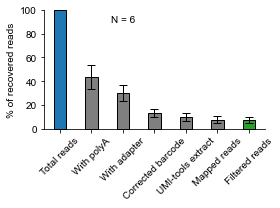

In [4]:
m = pd.read_csv("data_yield_of_sccolor_seq.tsv", sep="\t", index_col=0)
m = m[["TotalRatio", "PolyARatio", "AdapterRatio", "MergedFullRatio", "UmitoolsExtractRatio", "MappedRatio", "FilteredRatio"]]
ys = m.mean(axis=0) * 100
yerr = m.std(axis=0) * 100
print("Mean:")
print(ys)
print("-" * 80)
print("Std:")
print(yerr)
print("-" * 80)

xs = np.arange(len(ys))
ticks = ["Total reads", "With polyA", "With adapter", "Corrected barcode", "UMI-tools extract", 
         "Mapped reads", "Filtered reads"]
colors = ["C0", "C7", "C7", "C7", "C7", "C7", "C2"]

plt.figure(figsize=(4, 3))
plt.bar(xs, ys, yerr=yerr, width=0.4, edgecolor="black", color=colors,
        error_kw={"capsize": 4, "lw": 1},
        clip_on=False)
plt.text(2, 90, "N = %d" % len(m), ha="center")
plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
plt.xticks(xs, ticks, rotation=45)
plt.ylim(0, 100)
plt.ylabel("% of recovered reads")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/scCOLORseq_recovered_of_reads.png", dpi=300)